In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

import cv2, os

In [0]:
# from PIL import Image
# # load the image
# image = Image.open('drive/My Drive/dataset_coffee/dataset_percobaan1/kelas_1/DSCF0903.JPG')
# # summarize some details about the image
# print(image.format)
# print(image.mode)
# print(image.size)
# # show the image
# image.show()

In [0]:
header = ['no', 'id', 'iso', 'class','label']

from google.colab import files
uploaded = files.upload()

Saving dasetallclass.csv to dasetallclass.csv


In [0]:
import io
dtLabel = pd.read_csv(io.BytesIO(uploaded['dasetallclass.csv']))

#dataset is now stored in a pandas dataframe
dtLabel

,no,id,iso,class,label
0,1,DSCF0903.JPG,400,specialty,1
1,2,DSCF0900.JPG,800,specialty,1
2,3,DSCF0904.JPG,1250,specialty,1
3,4,DSCF0905.JPG,400,specialty,1
4,5,DSCF0910.JPG,800,specialty,1
...,...,...,...,...,...
535,536,DSCF1724.JPG,800,exchange,3
536,537,DSCF1725.JPG,1250,exchange,3
537,538,DSCF1726.JPG,400,exchange,3
538,539,DSCF1727.JPG,800,exchange,3


In [0]:
width = 265#1920#530#265
height = 265#149#1024#298#149

In [0]:
listId = dtLabel['id'] #dari dataset

# train == dtLabel

### COBA UBAH KAYAK YANG BAWAH

import glob
image_list = []
arrayImages = []
for i in tqdm(range(dtLabel.shape[0])):
  img = image.load_img('drive/My Drive/dataset_coffee/dasetallclass/' + dtLabel['id'][i])
  print(img)
  img = img.resize((width, height))#.convert('L') #265:149
  #img = np.array(img)
  image_list.append(img)
  img = np.array(img)
  arrayImages.append(img)

label = dtLabel['label']

  0%|          | 0/540 [00:00<?, ?it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876B247F0>


  0%|          | 1/540 [00:04<41:30,  4.62s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876B246A0>


  0%|          | 2/540 [00:05<31:14,  3.48s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876296668>


  1%|          | 3/540 [00:06<24:02,  2.69s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876296668>


  1%|          | 4/540 [00:07<19:01,  2.13s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876B246D8>


  1%|          | 5/540 [00:07<15:25,  1.73s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876298D68>


  1%|          | 6/540 [00:08<12:52,  1.45s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876298D68>


  1%|▏         | 7/540 [00:09<11:01,  1.24s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876298D68>


  1%|▏         | 8/540 [00:10<09:40,  1.09s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876298D68>


  2%|▏         | 9/540 [00:11<09:00,  1.02s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876298D68>


  2%|▏         | 10/540 [00:11<08:22,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876298D68>


  2%|▏         | 11/540 [00:12<08:03,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876B247F0>


  2%|▏         | 12/540 [00:13<08:17,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762A8EB8>


  2%|▏         | 13/540 [00:14<08:18,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762A8EB8>


  3%|▎         | 14/540 [00:15<07:53,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762A8EB8>


  3%|▎         | 15/540 [00:16<07:40,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762A8EB8>


  3%|▎         | 16/540 [00:17<07:27,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876B246D8>


  3%|▎         | 17/540 [00:17<07:24,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762ABD68>


  3%|▎         | 18/540 [00:18<07:17,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762ABD68>


  4%|▎         | 19/540 [00:19<07:04,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876B247F0>


  4%|▎         | 20/540 [00:20<06:58,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876B247F0>


  4%|▍         | 21/540 [00:21<07:07,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876236780>


  4%|▍         | 22/540 [00:21<07:11,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876236710>


  4%|▍         | 23/540 [00:22<07:09,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876236CC0>


  4%|▍         | 24/540 [00:23<07:09,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876236780>


  5%|▍         | 25/540 [00:24<07:05,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876237EF0>


  5%|▍         | 26/540 [00:25<06:58,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876237860>


  5%|▌         | 27/540 [00:26<07:12,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762378D0>


  5%|▌         | 28/540 [00:26<07:04,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762375C0>


  5%|▌         | 29/540 [00:27<06:56,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762375C0>


  6%|▌         | 30/540 [00:28<06:49,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762374E0>


  6%|▌         | 31/540 [00:29<06:49,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876237A20>


  6%|▌         | 32/540 [00:30<06:44,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876237A90>


  6%|▌         | 33/540 [00:30<06:41,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762379B0>


  6%|▋         | 34/540 [00:31<06:43,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762374E0>


  6%|▋         | 35/540 [00:32<06:42,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876237E10>


  7%|▋         | 36/540 [00:33<06:46,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876237550>


  7%|▋         | 37/540 [00:34<06:41,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876237BE0>


  7%|▋         | 38/540 [00:34<06:39,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762374E0>


  7%|▋         | 39/540 [00:35<06:35,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876237E10>


  7%|▋         | 40/540 [00:36<06:44,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762399B0>


  8%|▊         | 41/540 [00:37<06:46,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239630>


  8%|▊         | 42/540 [00:38<07:48,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239F28>


  8%|▊         | 43/540 [00:39<07:20,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762398D0>


  8%|▊         | 44/540 [00:40<07:10,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239BA8>


  8%|▊         | 45/540 [00:40<07:00,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239A90>


  9%|▊         | 46/540 [00:41<06:53,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239908>


  9%|▊         | 47/540 [00:42<06:54,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239DD8>


  9%|▉         | 48/540 [00:43<06:46,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239DA0>


  9%|▉         | 49/540 [00:44<06:57,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762394E0>


  9%|▉         | 50/540 [00:45<06:48,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762394A8>


  9%|▉         | 51/540 [00:45<06:52,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239978>


 10%|▉         | 52/540 [00:46<06:51,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239940>


 10%|▉         | 53/540 [00:47<06:43,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762397B8>


 10%|█         | 54/540 [00:48<06:56,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239198>


 10%|█         | 55/540 [00:49<06:46,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239E80>


 10%|█         | 56/540 [00:50<06:42,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239D30>


 11%|█         | 57/540 [00:50<06:31,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239C18>


 11%|█         | 58/540 [00:51<06:50,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762395C0>


 11%|█         | 59/540 [00:52<06:36,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239B70>


 11%|█         | 60/540 [00:53<06:29,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762399B0>


 11%|█▏        | 61/540 [00:54<06:27,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762397F0>


 11%|█▏        | 62/540 [00:54<06:18,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239C50>


 12%|█▏        | 63/540 [00:55<06:15,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762393C8>


 12%|█▏        | 64/540 [00:56<06:11,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239518>


 12%|█▏        | 65/540 [00:57<06:18,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239860>


 12%|█▏        | 66/540 [00:58<06:17,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239400>


 12%|█▏        | 67/540 [00:58<06:14,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239588>


 13%|█▎        | 68/540 [00:59<06:14,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239630>


 13%|█▎        | 69/540 [01:00<06:22,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239400>


 13%|█▎        | 70/540 [01:01<06:17,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239588>


 13%|█▎        | 71/540 [01:02<06:14,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762392B0>


 13%|█▎        | 72/540 [01:02<06:23,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239860>


 14%|█▎        | 73/540 [01:03<06:17,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762390B8>


 14%|█▎        | 74/540 [01:04<06:11,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239588>


 14%|█▍        | 75/540 [01:05<06:07,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876239588>


 14%|█▍        | 76/540 [01:06<06:04,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762433C8>


 14%|█▍        | 77/540 [01:06<06:01,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243518>


 14%|█▍        | 78/540 [01:07<06:01,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243C50>


 15%|█▍        | 79/540 [01:08<05:57,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243BE0>


 15%|█▍        | 80/540 [01:09<06:03,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243320>


 15%|█▌        | 81/540 [01:10<06:05,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243B00>


 15%|█▌        | 82/540 [01:10<06:05,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243160>


 15%|█▌        | 83/540 [01:11<06:01,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243550>


 16%|█▌        | 84/540 [01:12<06:09,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243780>


 16%|█▌        | 85/540 [01:13<06:10,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243A90>


 16%|█▌        | 86/540 [01:14<06:00,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243588>


 16%|█▌        | 87/540 [01:14<06:06,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762432B0>


 16%|█▋        | 88/540 [01:15<06:00,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762439E8>


 16%|█▋        | 89/540 [01:16<06:07,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243908>


 17%|█▋        | 90/540 [01:17<06:05,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762432E8>


 17%|█▋        | 91/540 [01:18<06:00,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243E80>


 17%|█▋        | 92/540 [01:18<06:13,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243320>


 17%|█▋        | 93/540 [01:19<06:09,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243470>


 17%|█▋        | 94/540 [01:20<06:08,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243DD8>


 18%|█▊        | 95/540 [01:21<06:05,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243400>


 18%|█▊        | 96/540 [01:22<06:19,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243F60>


 18%|█▊        | 97/540 [01:23<06:12,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243DD8>


 18%|█▊        | 98/540 [01:23<06:04,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762437B8>


 18%|█▊        | 99/540 [01:24<06:01,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762431D0>


 19%|█▊        | 100/540 [01:25<05:56,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762437F0>


 19%|█▊        | 101/540 [01:26<05:53,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243B70>


 19%|█▉        | 102/540 [01:27<05:52,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243358>


 19%|█▉        | 103/540 [01:27<05:48,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243BA8>


 19%|█▉        | 104/540 [01:28<06:10,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243EF0>


 19%|█▉        | 105/540 [01:29<06:28,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243358>


 20%|█▉        | 106/540 [01:30<06:16,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243BA8>


 20%|█▉        | 107/540 [01:31<06:06,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243EF0>


 20%|██        | 108/540 [01:32<06:06,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243710>


 20%|██        | 109/540 [01:33<06:05,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762430B8>


 20%|██        | 110/540 [01:33<05:52,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243B70>


 21%|██        | 111/540 [01:34<05:50,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876243CF8>


 21%|██        | 112/540 [01:35<05:48,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246B00>


 21%|██        | 113/540 [01:36<05:43,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762462B0>


 21%|██        | 114/540 [01:37<05:53,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246828>


 21%|██▏       | 115/540 [01:38<06:05,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246438>


 21%|██▏       | 116/540 [01:39<06:11,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246BE0>


 22%|██▏       | 117/540 [01:39<06:08,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762468D0>


 22%|██▏       | 118/540 [01:40<06:06,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246E48>


 22%|██▏       | 119/540 [01:41<06:00,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246908>


 22%|██▏       | 120/540 [01:42<05:55,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246E80>


 22%|██▏       | 121/540 [01:43<05:44,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762464E0>


 23%|██▎       | 122/540 [01:44<05:55,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762469B0>


 23%|██▎       | 123/540 [01:44<05:48,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762462E8>


 23%|██▎       | 124/540 [01:45<05:39,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246748>


 23%|██▎       | 125/540 [01:46<05:40,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762460B8>


 23%|██▎       | 126/540 [01:47<05:37,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762465F8>


 24%|██▎       | 127/540 [01:48<05:34,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246F28>


 24%|██▎       | 128/540 [01:48<05:33,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246E10>


 24%|██▍       | 129/540 [01:49<05:34,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246FD0>


 24%|██▍       | 130/540 [01:50<05:43,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246710>


 24%|██▍       | 131/540 [01:51<06:16,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246240>


 24%|██▍       | 132/540 [01:52<06:33,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246240>


 25%|██▍       | 133/540 [01:53<06:10,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246208>


 25%|██▍       | 134/540 [01:54<05:51,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246978>


 25%|██▌       | 135/540 [01:55<06:49,  1.01s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762465C0>


 25%|██▌       | 136/540 [01:56<06:19,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762467F0>


 25%|██▌       | 137/540 [01:57<05:59,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762460F0>


 26%|██▌       | 138/540 [01:58<05:47,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246668>


 26%|██▌       | 139/540 [01:58<05:38,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246400>


 26%|██▌       | 140/540 [01:59<05:30,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246198>


 26%|██▌       | 141/540 [02:00<05:30,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246278>


 26%|██▋       | 142/540 [02:01<05:46,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246F60>


 26%|██▋       | 143/540 [02:02<05:39,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246FD0>


 27%|██▋       | 144/540 [02:03<05:35,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762460F0>


 27%|██▋       | 145/540 [02:04<05:48,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246A58>


 27%|██▋       | 146/540 [02:04<05:39,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246278>


 27%|██▋       | 147/540 [02:05<05:29,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876246278>


 27%|██▋       | 148/540 [02:06<05:29,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B9B0>


 28%|██▊       | 149/540 [02:07<05:18,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B978>


 28%|██▊       | 150/540 [02:08<05:18,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B0B8>


 28%|██▊       | 151/540 [02:08<05:13,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B5F8>


 28%|██▊       | 152/540 [02:09<05:24,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B160>


 28%|██▊       | 153/540 [02:10<05:26,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624BDA0>


 29%|██▊       | 154/540 [02:11<05:15,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B5C0>


 29%|██▊       | 155/540 [02:12<05:24,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624BE48>


 29%|██▉       | 156/540 [02:13<05:19,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B400>


 29%|██▉       | 157/540 [02:13<05:14,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B668>


 29%|██▉       | 158/540 [02:14<05:10,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624BEB8>


 29%|██▉       | 159/540 [02:15<05:05,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B278>


 30%|██▉       | 160/540 [02:16<05:02,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624BB00>


 30%|██▉       | 161/540 [02:17<05:19,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B8D0>


 30%|███       | 162/540 [02:18<05:16,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B2B0>


 30%|███       | 163/540 [02:18<05:06,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B9E8>


 30%|███       | 164/540 [02:19<05:05,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624BA20>


 31%|███       | 165/540 [02:20<05:08,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B2B0>


 31%|███       | 166/540 [02:21<05:14,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624BCF8>


 31%|███       | 167/540 [02:22<05:06,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624BF28>


 31%|███       | 168/540 [02:22<05:04,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B320>


 31%|███▏      | 169/540 [02:23<04:57,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624BDD8>


 31%|███▏      | 170/540 [02:24<05:04,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624BC50>


 32%|███▏      | 171/540 [02:25<05:08,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B4A8>


 32%|███▏      | 172/540 [02:26<05:06,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B940>


 32%|███▏      | 173/540 [02:27<05:06,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624BF60>


 32%|███▏      | 174/540 [02:27<05:03,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B7B8>


 32%|███▏      | 175/540 [02:28<04:59,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B7B8>


 33%|███▎      | 176/540 [02:29<05:05,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624BBA8>


 33%|███▎      | 177/540 [02:30<05:03,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B240>


 33%|███▎      | 178/540 [02:31<04:55,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624BAC8>


 33%|███▎      | 179/540 [02:31<04:51,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B6A0>


 33%|███▎      | 180/540 [02:32<05:05,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B710>


 34%|███▎      | 181/540 [02:33<05:01,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B4E0>


 34%|███▎      | 182/540 [02:34<05:01,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624B748>


 34%|███▍      | 183/540 [02:35<05:07,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624BD68>


 34%|███▍      | 184/540 [02:36<04:56,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87624BD68>


 34%|███▍      | 185/540 [02:37<04:58,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F2B0>


 34%|███▍      | 186/540 [02:38<05:06,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F160>


 35%|███▍      | 187/540 [02:38<04:53,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F6A0>


 35%|███▍      | 188/540 [02:39<04:47,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F898>


 35%|███▌      | 189/540 [02:40<05:07,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625FE48>


 35%|███▌      | 190/540 [02:41<04:55,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F9E8>


 35%|███▌      | 191/540 [02:42<04:52,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F9E8>


 36%|███▌      | 192/540 [02:43<04:58,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F908>


 36%|███▌      | 193/540 [02:43<04:57,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625FC18>


 36%|███▌      | 194/540 [02:44<04:50,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F518>


 36%|███▌      | 195/540 [02:45<04:42,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625FA20>


 36%|███▋      | 196/540 [02:46<04:34,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625FAC8>


 36%|███▋      | 197/540 [02:47<04:28,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625FEF0>


 37%|███▋      | 198/540 [02:47<04:30,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625FEB8>


 37%|███▋      | 199/540 [02:48<04:28,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625FF28>


 37%|███▋      | 200/540 [02:49<04:25,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625FA58>


 37%|███▋      | 201/540 [02:50<04:24,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625FF98>


 37%|███▋      | 202/540 [02:50<04:22,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625FC50>


 38%|███▊      | 203/540 [02:51<04:23,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625FD68>


 38%|███▊      | 204/540 [02:52<04:35,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F828>


 38%|███▊      | 205/540 [02:53<04:31,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625FD30>


 38%|███▊      | 206/540 [02:54<04:33,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F630>


 38%|███▊      | 207/540 [02:55<04:30,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F4A8>


 39%|███▊      | 208/540 [02:55<04:26,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625FB38>


 39%|███▊      | 209/540 [02:56<04:24,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625FB00>


 39%|███▉      | 210/540 [02:57<04:32,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F668>


 39%|███▉      | 211/540 [02:58<04:23,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F550>


 39%|███▉      | 212/540 [02:59<04:18,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F0B8>


 39%|███▉      | 213/540 [02:59<04:18,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625FE10>


 40%|███▉      | 214/540 [03:00<04:21,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F668>


 40%|███▉      | 215/540 [03:01<04:28,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F978>


 40%|████      | 216/540 [03:02<04:26,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F278>


 40%|████      | 217/540 [03:03<04:17,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625FB00>


 40%|████      | 218/540 [03:03<04:12,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F5F8>


 41%|████      | 219/540 [03:04<04:12,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87625F5F8>


 41%|████      | 220/540 [03:05<04:11,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762635C0>


 41%|████      | 221/540 [03:06<04:12,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263438>


 41%|████      | 222/540 [03:07<04:17,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263748>


 41%|████▏     | 223/540 [03:07<04:19,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263828>


 41%|████▏     | 224/540 [03:08<04:24,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263C18>


 42%|████▏     | 225/540 [03:09<04:25,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762632E8>


 42%|████▏     | 226/540 [03:10<04:21,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263E80>


 42%|████▏     | 227/540 [03:11<04:18,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263C88>


 42%|████▏     | 228/540 [03:12<04:16,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263B70>


 42%|████▏     | 229/540 [03:12<04:10,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263400>


 43%|████▎     | 230/540 [03:13<04:10,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263080>


 43%|████▎     | 231/540 [03:14<04:16,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263B38>


 43%|████▎     | 232/540 [03:15<04:19,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762639B0>


 43%|████▎     | 233/540 [03:16<04:21,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263B00>


 43%|████▎     | 234/540 [03:17<04:21,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263A20>


 44%|████▎     | 235/540 [03:17<04:19,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263978>


 44%|████▎     | 236/540 [03:18<04:15,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263E10>


 44%|████▍     | 237/540 [03:19<04:16,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263278>


 44%|████▍     | 238/540 [03:20<04:12,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263278>


 44%|████▍     | 239/540 [03:21<04:08,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263E10>


 44%|████▍     | 240/540 [03:22<04:09,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263EB8>


 45%|████▍     | 241/540 [03:22<04:08,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263CC0>


 45%|████▍     | 242/540 [03:23<04:09,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263AC8>


 45%|████▌     | 243/540 [03:24<04:07,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762634E0>


 45%|████▌     | 244/540 [03:25<04:03,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263320>


 45%|████▌     | 245/540 [03:26<04:07,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263128>


 46%|████▌     | 246/540 [03:27<04:06,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762636A0>


 46%|████▌     | 247/540 [03:27<03:58,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263710>


 46%|████▌     | 248/540 [03:28<03:55,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263048>


 46%|████▌     | 249/540 [03:29<03:55,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263940>


 46%|████▋     | 250/540 [03:30<04:00,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263EF0>


 46%|████▋     | 251/540 [03:31<04:10,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263908>


 47%|████▋     | 252/540 [03:32<04:10,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762630B8>


 47%|████▋     | 253/540 [03:33<04:09,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263BE0>


 47%|████▋     | 254/540 [03:33<04:02,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762633C8>


 47%|████▋     | 255/540 [03:34<03:58,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263780>


 47%|████▋     | 256/540 [03:35<03:55,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876263780>


 48%|████▊     | 257/540 [03:36<03:52,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626CCC0>


 48%|████▊     | 258/540 [03:37<03:54,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626CAC8>


 48%|████▊     | 259/540 [03:37<03:49,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C518>


 48%|████▊     | 260/540 [03:39<04:10,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C198>


 48%|████▊     | 261/540 [03:39<04:05,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C320>


 49%|████▊     | 262/540 [03:40<04:03,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C898>


 49%|████▊     | 263/540 [03:41<03:56,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626CB38>


 49%|████▉     | 264/540 [03:42<03:53,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C358>


 49%|████▉     | 265/540 [03:43<03:45,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C710>


 49%|████▉     | 266/540 [03:43<03:41,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626CA20>


 49%|████▉     | 267/540 [03:44<03:39,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C1D0>


 50%|████▉     | 268/540 [03:45<03:38,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C438>


 50%|████▉     | 269/540 [03:46<03:37,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C4A8>


 50%|█████     | 270/540 [03:47<03:35,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C4A8>


 50%|█████     | 271/540 [03:47<03:30,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C550>


 50%|█████     | 272/540 [03:48<03:34,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C5F8>


 51%|█████     | 273/540 [03:49<03:33,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C4A8>


 51%|█████     | 274/540 [03:50<03:31,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626CCF8>


 51%|█████     | 275/540 [03:51<03:34,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626CC50>


 51%|█████     | 276/540 [03:51<03:37,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C9B0>


 51%|█████▏    | 277/540 [03:52<03:34,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626CC18>


 51%|█████▏    | 278/540 [03:53<03:31,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C6D8>


 52%|█████▏    | 279/540 [03:54<03:36,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626CDD8>


 52%|█████▏    | 280/540 [03:55<03:36,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626CE10>


 52%|█████▏    | 281/540 [03:56<03:31,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C6A0>


 52%|█████▏    | 282/540 [03:56<03:29,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C630>


 52%|█████▏    | 283/540 [03:57<03:27,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C470>


 53%|█████▎    | 284/540 [03:58<03:26,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C748>


 53%|█████▎    | 285/540 [03:59<03:27,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C400>


 53%|█████▎    | 286/540 [04:00<03:25,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626CE48>


 53%|█████▎    | 287/540 [04:00<03:24,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C4E0>


 53%|█████▎    | 288/540 [04:01<03:25,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626CE10>


 54%|█████▎    | 289/540 [04:02<03:22,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626CFD0>


 54%|█████▎    | 290/540 [04:03<03:21,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C400>


 54%|█████▍    | 291/540 [04:04<03:22,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87626C780>


 54%|█████▍    | 292/540 [04:04<03:17,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F92E8>


 54%|█████▍    | 293/540 [04:05<03:12,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F92B0>


 54%|█████▍    | 294/540 [04:06<03:17,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9BA8>


 55%|█████▍    | 295/540 [04:07<03:14,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9CC0>


 55%|█████▍    | 296/540 [04:08<03:40,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9630>


 55%|█████▌    | 297/540 [04:09<03:35,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9E80>


 55%|█████▌    | 298/540 [04:10<03:26,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9AC8>


 55%|█████▌    | 299/540 [04:10<03:24,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9A58>


 56%|█████▌    | 300/540 [04:11<03:20,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F94E0>


 56%|█████▌    | 301/540 [04:12<03:18,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9780>


 56%|█████▌    | 302/540 [04:13<03:20,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F94A8>


 56%|█████▌    | 303/540 [04:14<03:20,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F94A8>


 56%|█████▋    | 304/540 [04:15<03:19,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9940>


 56%|█████▋    | 305/540 [04:15<03:13,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F99B0>


 57%|█████▋    | 306/540 [04:16<03:16,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9898>


 57%|█████▋    | 307/540 [04:17<03:13,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F91D0>


 57%|█████▋    | 308/540 [04:18<03:09,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9550>


 57%|█████▋    | 309/540 [04:19<03:08,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9A20>


 57%|█████▋    | 310/540 [04:19<03:06,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9B70>


 58%|█████▊    | 311/540 [04:20<03:15,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9828>


 58%|█████▊    | 312/540 [04:21<03:14,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F97F0>


 58%|█████▊    | 313/540 [04:22<03:11,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9710>


 58%|█████▊    | 314/540 [04:23<03:09,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9F28>


 58%|█████▊    | 315/540 [04:24<03:09,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9F60>


 59%|█████▊    | 316/540 [04:24<03:00,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9C88>


 59%|█████▊    | 317/540 [04:25<02:58,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F99E8>


 59%|█████▉    | 318/540 [04:26<02:58,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F96D8>


 59%|█████▉    | 319/540 [04:27<02:59,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F93C8>


 59%|█████▉    | 320/540 [04:28<02:56,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9048>


 59%|█████▉    | 321/540 [04:29<02:59,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F96D8>


 60%|█████▉    | 322/540 [04:29<02:56,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F93C8>


 60%|█████▉    | 323/540 [04:30<02:55,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F90B8>


 60%|██████    | 324/540 [04:31<02:54,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F99E8>


 60%|██████    | 325/540 [04:32<02:55,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F9198>


 60%|██████    | 326/540 [04:33<02:53,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F90B8>


 61%|██████    | 327/540 [04:33<02:55,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761F99E8>


 61%|██████    | 328/540 [04:34<02:55,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762069B0>


 61%|██████    | 329/540 [04:35<02:51,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206518>


 61%|██████    | 330/540 [04:36<02:50,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206AC8>


 61%|██████▏   | 331/540 [04:37<02:55,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762062B0>


 61%|██████▏   | 332/540 [04:38<03:01,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206748>


 62%|██████▏   | 333/540 [04:38<02:56,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206208>


 62%|██████▏   | 334/540 [04:39<02:50,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762064E0>


 62%|██████▏   | 335/540 [04:40<02:45,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206DD8>


 62%|██████▏   | 336/540 [04:41<02:45,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206EF0>


 62%|██████▏   | 337/540 [04:42<02:46,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206B00>


 63%|██████▎   | 338/540 [04:43<02:45,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762065F8>


 63%|██████▎   | 339/540 [04:43<02:44,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762060F0>


 63%|██████▎   | 340/540 [04:44<02:40,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206320>


 63%|██████▎   | 341/540 [04:45<02:42,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206BE0>


 63%|██████▎   | 342/540 [04:46<02:45,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206E10>


 64%|██████▎   | 343/540 [04:47<02:40,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762063C8>


 64%|██████▎   | 344/540 [04:47<02:41,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206C50>


 64%|██████▍   | 345/540 [04:48<02:41,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762068D0>


 64%|██████▍   | 346/540 [04:49<02:38,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206A58>


 64%|██████▍   | 347/540 [04:50<02:39,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762066A0>


 64%|██████▍   | 348/540 [04:51<02:35,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206C18>


 65%|██████▍   | 349/540 [04:51<02:34,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762067F0>


 65%|██████▍   | 350/540 [04:52<02:36,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206630>


 65%|██████▌   | 351/540 [04:53<02:36,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206C18>


 65%|██████▌   | 352/540 [04:54<02:33,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762060B8>


 65%|██████▌   | 353/540 [04:55<02:33,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762069E8>


 66%|██████▌   | 354/540 [04:56<02:31,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762061D0>


 66%|██████▌   | 355/540 [04:56<02:28,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762064A8>


 66%|██████▌   | 356/540 [04:57<02:33,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206470>


 66%|██████▌   | 357/540 [04:58<02:33,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206898>


 66%|██████▋   | 358/540 [04:59<02:27,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206390>


 66%|██████▋   | 359/540 [05:00<02:30,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206FD0>


 67%|██████▋   | 360/540 [05:01<02:28,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206128>


 67%|██████▋   | 361/540 [05:01<02:33,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206710>


 67%|██████▋   | 362/540 [05:02<02:28,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762060B8>


 67%|██████▋   | 363/540 [05:03<02:26,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876206E80>


 67%|██████▋   | 364/540 [05:04<02:25,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210668>


 68%|██████▊   | 365/540 [05:05<02:23,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210438>


 68%|██████▊   | 366/540 [05:06<02:42,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210D68>


 68%|██████▊   | 367/540 [05:07<02:35,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762105C0>


 68%|██████▊   | 368/540 [05:08<02:29,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210A90>


 68%|██████▊   | 369/540 [05:08<02:26,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210D68>


 69%|██████▊   | 370/540 [05:09<02:22,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210D68>


 69%|██████▊   | 371/540 [05:10<02:19,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210D68>


 69%|██████▉   | 372/540 [05:11<02:25,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762104A8>


 69%|██████▉   | 373/540 [05:12<02:36,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210898>


 69%|██████▉   | 374/540 [05:13<02:32,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210358>


 69%|██████▉   | 375/540 [05:14<02:26,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762100F0>


 70%|██████▉   | 376/540 [05:14<02:21,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210C88>


 70%|██████▉   | 377/540 [05:15<02:17,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210A58>


 70%|███████   | 378/540 [05:16<02:14,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210FD0>


 70%|███████   | 379/540 [05:17<02:11,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210DD8>


 70%|███████   | 380/540 [05:18<02:16,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762109B0>


 71%|███████   | 381/540 [05:19<02:18,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210080>


 71%|███████   | 382/540 [05:20<02:19,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210160>


 71%|███████   | 383/540 [05:21<02:23,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210BE0>


 71%|███████   | 384/540 [05:21<02:16,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210588>


 71%|███████▏  | 385/540 [05:22<02:11,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210908>


 71%|███████▏  | 386/540 [05:23<02:10,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210CC0>


 72%|███████▏  | 387/540 [05:24<02:08,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210EB8>


 72%|███████▏  | 388/540 [05:25<02:04,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210320>


 72%|███████▏  | 389/540 [05:25<02:01,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762107B8>


 72%|███████▏  | 390/540 [05:26<02:02,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210208>


 72%|███████▏  | 391/540 [05:27<02:05,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210EF0>


 73%|███████▎  | 392/540 [05:28<02:07,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762107F0>


 73%|███████▎  | 393/540 [05:29<02:02,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210940>


 73%|███████▎  | 394/540 [05:30<01:59,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210CF8>


 73%|███████▎  | 395/540 [05:30<01:57,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210828>


 73%|███████▎  | 396/540 [05:31<02:03,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762106D8>


 74%|███████▎  | 397/540 [05:32<02:01,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210748>


 74%|███████▎  | 398/540 [05:33<02:00,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210320>


 74%|███████▍  | 399/540 [05:34<02:04,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876210320>


 74%|███████▍  | 400/540 [05:35<01:58,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762167F0>


 74%|███████▍  | 401/540 [05:36<01:55,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216E48>


 74%|███████▍  | 402/540 [05:36<01:54,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762163C8>


 75%|███████▍  | 403/540 [05:37<01:52,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216898>


 75%|███████▍  | 404/540 [05:38<01:51,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216828>


 75%|███████▌  | 405/540 [05:39<01:50,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216668>


 75%|███████▌  | 406/540 [05:40<01:51,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216898>


 75%|███████▌  | 407/540 [05:40<01:49,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216208>


 76%|███████▌  | 408/540 [05:41<01:50,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216080>


 76%|███████▌  | 409/540 [05:42<01:51,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216C50>


 76%|███████▌  | 410/540 [05:43<01:48,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216438>


 76%|███████▌  | 411/540 [05:44<01:46,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216160>


 76%|███████▋  | 412/540 [05:45<01:46,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762162B0>


 76%|███████▋  | 413/540 [05:45<01:43,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216550>


 77%|███████▋  | 414/540 [05:47<01:58,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216B00>


 77%|███████▋  | 415/540 [05:48<01:59,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216F60>


 77%|███████▋  | 416/540 [05:49<01:56,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216E80>


 77%|███████▋  | 417/540 [05:49<01:51,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216DD8>


 77%|███████▋  | 418/540 [05:50<01:46,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216470>


 78%|███████▊  | 419/540 [05:51<01:43,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762169B0>


 78%|███████▊  | 420/540 [05:52<01:41,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216588>


 78%|███████▊  | 421/540 [05:53<01:38,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762164E0>


 78%|███████▊  | 422/540 [05:53<01:37,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762166D8>


 78%|███████▊  | 423/540 [05:54<01:36,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216278>


 79%|███████▊  | 424/540 [05:55<01:34,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216F28>


 79%|███████▊  | 425/540 [05:56<01:34,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762161D0>


 79%|███████▉  | 426/540 [05:57<01:33,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762165C0>


 79%|███████▉  | 427/540 [05:58<01:31,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216CF8>


 79%|███████▉  | 428/540 [05:58<01:30,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216FD0>


 79%|███████▉  | 429/540 [05:59<01:32,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216D30>


 80%|███████▉  | 430/540 [06:00<01:38,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216EF0>


 80%|███████▉  | 431/540 [06:01<01:38,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216DA0>


 80%|████████  | 432/540 [06:02<01:35,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216518>


 80%|████████  | 433/540 [06:03<01:31,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216A90>


 80%|████████  | 434/540 [06:04<01:29,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216EF0>


 81%|████████  | 435/540 [06:04<01:26,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876216B70>


 81%|████████  | 436/540 [06:05<01:25,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762208D0>


 81%|████████  | 437/540 [06:06<01:27,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220B70>


 81%|████████  | 438/540 [06:07<01:27,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762202E8>


 81%|████████▏ | 439/540 [06:08<01:23,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220550>


 81%|████████▏ | 440/540 [06:09<01:21,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220390>


 82%|████████▏ | 441/540 [06:09<01:22,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220630>


 82%|████████▏ | 442/540 [06:10<01:21,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220BE0>


 82%|████████▏ | 443/540 [06:11<01:19,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220C88>


 82%|████████▏ | 444/540 [06:12<01:18,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220D30>


 82%|████████▏ | 445/540 [06:13<01:18,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220B38>


 83%|████████▎ | 446/540 [06:14<01:17,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220E10>


 83%|████████▎ | 447/540 [06:14<01:15,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220320>


 83%|████████▎ | 448/540 [06:15<01:15,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220F28>


 83%|████████▎ | 449/540 [06:16<01:15,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762207F0>


 83%|████████▎ | 450/540 [06:17<01:14,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220978>


 84%|████████▎ | 451/540 [06:18<01:15,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762209E8>


 84%|████████▎ | 452/540 [06:19<01:13,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762201D0>


 84%|████████▍ | 453/540 [06:19<01:11,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220278>


 84%|████████▍ | 454/540 [06:20<01:10,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220C18>


 84%|████████▍ | 455/540 [06:21<01:13,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762202B0>


 84%|████████▍ | 456/540 [06:22<01:10,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220438>


 85%|████████▍ | 457/540 [06:23<01:09,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220668>


 85%|████████▍ | 458/540 [06:24<01:09,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220160>


 85%|████████▌ | 459/540 [06:24<01:07,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220160>


 85%|████████▌ | 460/540 [06:25<01:08,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220898>


 85%|████████▌ | 461/540 [06:26<01:07,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220128>


 86%|████████▌ | 462/540 [06:27<01:05,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220780>


 86%|████████▌ | 463/540 [06:28<01:02,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220828>


 86%|████████▌ | 464/540 [06:29<01:02,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762207B8>


 86%|████████▌ | 465/540 [06:29<01:00,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220E48>


 86%|████████▋ | 466/540 [06:30<01:01,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220748>


 86%|████████▋ | 467/540 [06:31<00:58,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220DA0>


 87%|████████▋ | 468/540 [06:32<00:57,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220470>


 87%|████████▋ | 469/540 [06:32<00:56,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8762200F0>


 87%|████████▋ | 470/540 [06:33<00:56,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220EB8>


 87%|████████▋ | 471/540 [06:34<00:55,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA876220080>


 87%|████████▋ | 472/540 [06:35<00:54,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F278>


 88%|████████▊ | 473/540 [06:36<00:52,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FBE0>


 88%|████████▊ | 474/540 [06:36<00:51,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F400>


 88%|████████▊ | 475/540 [06:37<00:51,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FF98>


 88%|████████▊ | 476/540 [06:38<00:53,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F518>


 88%|████████▊ | 477/540 [06:39<00:54,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F518>


 89%|████████▊ | 478/540 [06:40<00:52,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F048>


 89%|████████▊ | 479/540 [06:41<00:50,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FFD0>


 89%|████████▉ | 480/540 [06:42<00:49,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FB38>


 89%|████████▉ | 481/540 [06:43<00:51,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F438>


 89%|████████▉ | 482/540 [06:43<00:49,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F0B8>


 89%|████████▉ | 483/540 [06:44<00:49,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F6A0>


 90%|████████▉ | 484/540 [06:45<00:46,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FB00>


 90%|████████▉ | 485/540 [06:46<00:52,  1.05it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F5F8>


 90%|█████████ | 486/540 [06:47<00:50,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F828>


 90%|█████████ | 487/540 [06:48<00:47,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FB00>


 90%|█████████ | 488/540 [06:49<00:46,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F400>


 91%|█████████ | 489/540 [06:50<00:44,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FDA0>


 91%|█████████ | 490/540 [06:50<00:42,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FE48>


 91%|█████████ | 491/540 [06:51<00:40,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FE48>


 91%|█████████ | 492/540 [06:52<00:39,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F080>


 91%|█████████▏| 493/540 [06:53<00:37,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FC18>


 91%|█████████▏| 494/540 [06:54<00:37,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FEF0>


 92%|█████████▏| 495/540 [06:55<00:39,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FE48>


 92%|█████████▏| 496/540 [06:56<00:39,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FE48>


 92%|█████████▏| 497/540 [06:56<00:37,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FBA8>


 92%|█████████▏| 498/540 [06:57<00:36,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F9B0>


 92%|█████████▏| 499/540 [06:58<00:35,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FE10>


 93%|█████████▎| 500/540 [06:59<00:33,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FEF0>


 93%|█████████▎| 501/540 [07:00<00:31,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F358>


 93%|█████████▎| 502/540 [07:00<00:31,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F2E8>


 93%|█████████▎| 503/540 [07:01<00:30,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F860>


 93%|█████████▎| 504/540 [07:02<00:29,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622FEF0>


 94%|█████████▎| 505/540 [07:03<00:28,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F240>


 94%|█████████▎| 506/540 [07:04<00:29,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F978>


 94%|█████████▍| 507/540 [07:05<00:27,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA87622F978>


 94%|█████████▍| 508/540 [07:05<00:26,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9128>


 94%|█████████▍| 509/540 [07:06<00:25,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9C50>


 94%|█████████▍| 510/540 [07:07<00:26,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B94A8>


 95%|█████████▍| 511/540 [07:08<00:24,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9908>


 95%|█████████▍| 512/540 [07:09<00:23,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9CF8>


 95%|█████████▌| 513/540 [07:10<00:22,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9470>


 95%|█████████▌| 514/540 [07:10<00:21,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B96A0>


 95%|█████████▌| 515/540 [07:11<00:19,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9F60>


 96%|█████████▌| 516/540 [07:12<00:21,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9978>


 96%|█████████▌| 517/540 [07:13<00:19,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9860>


 96%|█████████▌| 518/540 [07:14<00:18,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9668>


 96%|█████████▌| 519/540 [07:15<00:17,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9048>


 96%|█████████▋| 520/540 [07:16<00:16,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9518>


 96%|█████████▋| 521/540 [07:16<00:15,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9A58>


 97%|█████████▋| 522/540 [07:17<00:14,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9390>


 97%|█████████▋| 523/540 [07:18<00:14,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9DD8>


 97%|█████████▋| 524/540 [07:19<00:13,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B90B8>


 97%|█████████▋| 525/540 [07:20<00:12,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9A20>


 97%|█████████▋| 526/540 [07:21<00:11,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B95C0>


 98%|█████████▊| 527/540 [07:21<00:10,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9BA8>


 98%|█████████▊| 528/540 [07:22<00:09,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9BE0>


 98%|█████████▊| 529/540 [07:23<00:08,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9198>


 98%|█████████▊| 530/540 [07:24<00:08,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B92E8>


 98%|█████████▊| 531/540 [07:25<00:07,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9400>


 99%|█████████▊| 532/540 [07:25<00:06,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9B38>


 99%|█████████▊| 533/540 [07:26<00:05,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9828>


 99%|█████████▉| 534/540 [07:27<00:04,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9438>


 99%|█████████▉| 535/540 [07:28<00:03,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9320>


 99%|█████████▉| 536/540 [07:29<00:03,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9F28>


 99%|█████████▉| 537/540 [07:29<00:02,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9B70>


100%|█████████▉| 538/540 [07:30<00:01,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9A90>


100%|█████████▉| 539/540 [07:31<00:00,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FA8761B9C18>


100%|██████████| 540/540 [07:32<00:00,  1.19it/s]


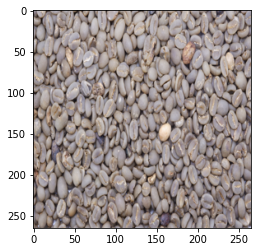

In [0]:
plt.imshow(image_list[20])

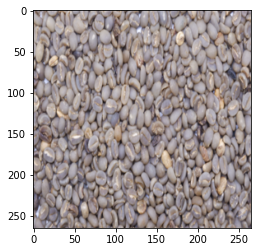

In [0]:
plt.imshow(image_list[200])

# Color Histogram

<function matplotlib.pyplot.show>

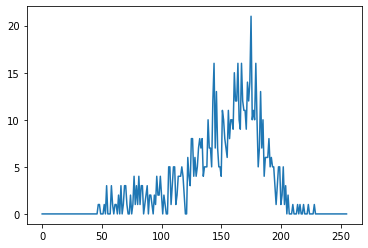

In [0]:
# coba histogram
histr = cv2.calcHist(arrayImages[200], [0], None, [256], [0,256])
plt.plot(histr)
plt.show

<function matplotlib.pyplot.show>

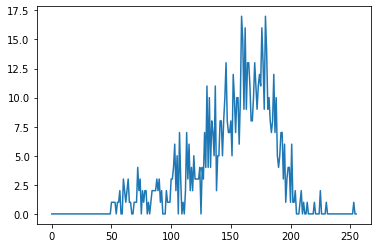

In [0]:
# coba histogram
histr = cv2.calcHist(arrayImages[200], [1], None, [256], [0,256])
plt.plot(histr)
plt.show

<function matplotlib.pyplot.show>

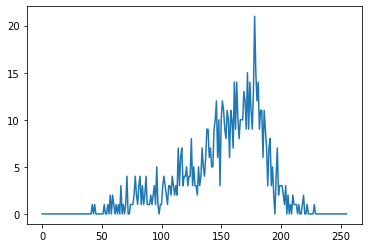

In [0]:
# coba histogram
histr = cv2.calcHist(arrayImages[200], [2], None, [256], [0,256])
plt.plot(histr)
plt.show

In [0]:
histr.shape

(256, 1)

In [0]:
hist, bin_edges = np.histogram(histr, density=True)

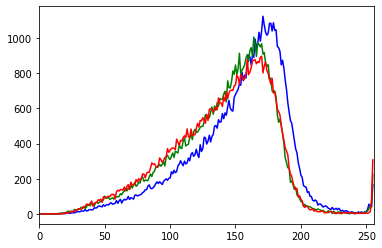

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([arrayImages[5]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [0]:
def getColorHistogram(rgb_image, channel):
  colHist = cv2.calcHist(rgb_image, [channel], None, [256], [0,256])
  (hist, _) = np.histogram(colHist, bins=256)
  return hist, colHist

In [0]:
listColHist = [] #list Color Histogram
listImgHist = [] #list image Color Histogram
for image in arrayImages:
  chist_red, img = getColorHistogram(image, 0)
  chist_green, img = getColorHistogram(image, 1)
  chist_blue, img = getColorHistogram(image, 2)

  totalHist = np.concatenate((chist_red, chist_green))
  totalHist = np.concatenate((totalHist, chist_blue))

  listColHist.append((totalHist))
  listImgHist.append(img)
print("Jumlah Citra: ", len(listColHist))

Jumlah Citra:  540


In [0]:
256 * 3

768

In [0]:
np.array(listColHist).shape

(540, 768)

In [0]:
#nnti coba dlu pake satu gambar atau satu indeks ajah dlu

def getLBPimage(gray_image): #asalnya gray_image
  
  #input gray image = color image of shape(height, width)

  #output img: LBP converted image of the same shape as

  #step 0: step 0, Convert image to grayscall but already done
  #using the grayscalling = [] before the LBP

  #LBPimages = []
  
  #kalau img_gray gak bisa coba pakek image_list
  #grayscalling the image in index first
  grayscalling = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
  imgLBP = np.zeros_like(grayscalling)
  neighboor = 3 

  for imgHeight in range(0,gray_image.shape[0] - neighboor):
    for imgWidth in range(0,gray_image.shape[1] - neighboor):

      # Step1: 3 by 3 pixel
      # image_list = np.asarray(image_list)
      img           = grayscalling[imgHeight:imgHeight+neighboor, imgWidth:imgWidth+neighboor]
      center        = img[1,1]
      img01         = (img >= center)*1.0
      img01_vector  = img01.T.flatten() #make array become flat in one line (vector)

      # it is ok to order counterclock manner
      # img01_vector = img01.flatten()

      # Step 2: *Binary Operation
      img01_vector = np.delete(img01_vector,4)

      # Step 3 : Decimal: Convert the binary operated values to a digit
      where_img01_vector = np.where(img01_vector)[0]
      if len(where_img01_vector) >= 1:
        num = np.sum(2**where_img01_vector)
      else:
        num = 0
      imgLBP[imgHeight+1, imgWidth+1] = num
  
  return imgLBP



# LBP Using Library

In [0]:
from skimage.feature import local_binary_pattern
def getLBPimageScikit(gray_image):
  p = 8
  r = 1
  grayscalling = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
  lbp = local_binary_pattern(grayscalling, p, r, method = 'default')
  n_bins = int(lbp.max() + 1)
  (hist, _) = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density = True)
  return hist, lbp

In [0]:
listHistLBP = []
listImgLBP = []
for image in arrayImages:
    hist, img = getLBPimageScikit(image)
    listHistLBP.append((hist))
    listImgLBP.append(img)
print("Jumlah Citra: ", len(listHistLBP))

Jumlah Citra:  540


In [0]:
np.array(listHistLBP).shape

(540, 256)

(array([208.,  21.,  11.,   2.,   6.,   1.,   2.,   0.,   4.,   1.]),
 array([0.        , 0.00579708, 0.01159416, 0.01739124, 0.02318832,
        0.0289854 , 0.03478248, 0.04057957, 0.04637665, 0.05217373,
        0.05797081]),
 <a list of 10 Patch objects>)

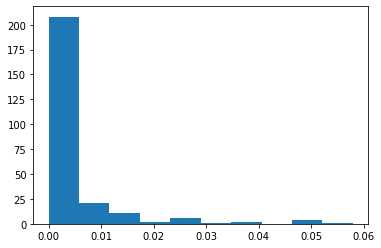

In [0]:
plt.hist(listHistLBP[20])

(array([214.,  14.,  11.,   3.,   6.,   3.,   1.,   0.,   1.,   3.]),
 array([0.        , 0.00598362, 0.01196725, 0.01795087, 0.0239345 ,
        0.02991812, 0.03590174, 0.04188537, 0.04786899, 0.05385262,
        0.05983624]),
 <a list of 10 Patch objects>)

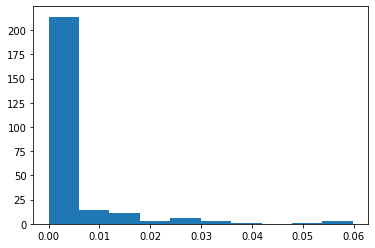

In [0]:
plt.hist(listHistLBP[189])

In [0]:
np.array(listColHist).shape

(540, 768)

In [0]:
listFeature = np.concatenate((listHistLBP, listColHist), axis=1)

In [0]:
listFeature.shape

(540, 1024)

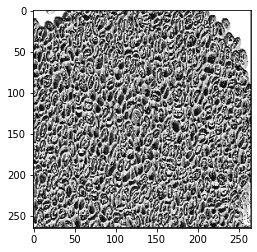

In [0]:
plt.imshow(listImgLBP[0], cmap="gray")

# Random Forrest Classifier

In [0]:
# coba satuin list histogram LBP sama Histogram Color
# imagesHist = listColHist, listHistLBP

### Only Using LBP Parameter

In [0]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)


#print("Akurasi", accuracy_score(y_test, y_pred))
#coba data train
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.7821229050279329


### Try Only using Histogram Parameter

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listColHist, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.48044692737430167


# KNN Classifier

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.9141274238227147


### parameter histogram

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listColHist, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)


#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.6149584487534626


# SVM Classifier

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn import svm
clf = svm.SVC(gamma="auto")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [0]:
from sklearn import metrics
print("Accuracy SVM: ", metrics.accuracy_score(y_test, y_pred))

Accuracy SVM:  0.3016759776536313


# ANN Classifier

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical, plot_model

In [0]:
input_shape = (256, )
num_classes = 3

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              526336    
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1

In [0]:
label[label == 3] = 0

label

# 0 1 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      1
1      1
2      1
3      1
4      1
      ..
535    0
536    0
537    0
538    0
539    0
Name: label, Length: 540, dtype: int64

In [0]:
y = to_categorical(label, num_classes=3)

In [0]:
print(y)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [0]:
listHistLBP_new = np.array(listHistLBP)
listHistLBP_new.shape

# 1 2 3 => dibaca 4 kelas karna mulai 0
# 0 1 2

(540, 256)

## ANN with LBP feature

In [0]:
X_train, X_test, y_train, y_test = train_test_split(listHistLBP_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=10000, validation_data=(X_test, y_test))

Output streaming akan dipotong hingga 5000 baris terakhir.
Epoch 5272/10000
12/12 [==============================] - 0s 40ms/step - loss: 1.0977 - accuracy: 0.3490 - val_loss: 1.1014 - val_accuracy: 0.3017
Epoch 5273/10000
12/12 [==============================] - 0s 40ms/step - loss: 1.0973 - accuracy: 0.3490 - val_loss: 1.1015 - val_accuracy: 0.3017
Epoch 5274/10000
12/12 [==============================] - 0s 39ms/step - loss: 1.0982 - accuracy: 0.3490 - val_loss: 1.1016 - val_accuracy: 0.3017
Epoch 5275/10000
12/12 [==============================] - 0s 40ms/step - loss: 1.0978 - accuracy: 0.3490 - val_loss: 1.1015 - val_accuracy: 0.3017
Epoch 5276/10000
12/12 [==============================] - 0s 39ms/step - loss: 1.0986 - accuracy: 0.3490 - val_loss: 1.1017 - val_accuracy: 0.3017
Epoch 5277/10000
12/12 [==============================] - 0s 39ms/step - loss: 1.0986 - accuracy: 0.3490 - val_loss: 1.1017 - val_accuracy: 0.3017
Epoch 5278/10000
12/12 [==============================] - 0

## ANN with Color Histogram and LBP (concatenate)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(listFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=10000, validation_data=(X_test, y_test))